In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Fit original data

In [2]:
data = pd.read_csv('data/starships_slice_init.csv', index_col='id', parse_dates=['date'])

In [3]:
# Compute stats for number of ships counted over time
counts_along_time = data.groupby(['ship_type', 'date']).count()['lon']
counts_stats = counts_along_time.groupby('ship_type').describe()

In [4]:
# Add boundaries
counts_stats['bound_max'] = counts_stats['mean'] + 1.8 * counts_stats['std']
counts_stats['bound_min'] = counts_stats['mean'] - 1.8 * counts_stats['std']
counts_stats

,count,mean,std,min,25%,50%,75%,max,bound_max,bound_min
ship_type,,,,,,,,,,
Civilian Star Shuttle,13.0,1.538462,0.776250,1.0,1.0,1.0,2.0,3.0,2.935712,0.141211
Imperial SpaceShuttle,17.0,10.941176,0.555719,10.0,11.0,11.0,11.0,12.0,11.941471,9.940882
TIE Fighter,17.0,21.529412,0.717430,21.0,21.0,21.0,22.0,23.0,22.820786,20.238038
TIE bomber,17.0,6.882353,0.332106,6.0,7.0,7.0,7.0,7.0,7.480143,6.284563


## Detect breaches

In [18]:
# Load new dataa
data = pd.read_csv('data/starships_slice_new_1.csv', index_col='id', parse_dates=['date'])

In [19]:
counts_along_time = data.groupby(['ship_type', 'date']).count()['lon']

In [20]:
# Create record of upper boundary broken
break_max = {}
break_min = {}

for ship in counts_stats.index:
    ma_ship_break_max = counts_along_time.loc[ship] > (counts_stats['bound_max'].loc[ship])
    ship_break_max = counts_along_time[ship][ma_ship_break_max]
    break_max[ship] = ship_break_max

    ma_ship_break_min = counts_along_time.loc[ship] < (counts_stats['bound_min'].loc[ship])
    ship_break_min = counts_along_time[ship][ma_ship_break_min]
    break_min[ship] = ship_break_min

In [21]:
break_max

{'Civilian Star Shuttle': date
 2019-05-08 12:00:00    3
 2019-11-08 12:00:00    3
 Name: lon, dtype: int64,
 'Imperial SpaceShuttle': date
 2019-01-21 12:00:00    12
 Name: lon, dtype: int64,
 'TIE Fighter': date
 2019-04-27 12:00:00    23
 Name: lon, dtype: int64,
 'TIE bomber': Series([], Name: lon, dtype: int64)}

In [22]:
break_min

{'Civilian Star Shuttle': Series([], Name: lon, dtype: int64),
 'Imperial SpaceShuttle': date
 2019-04-27 12:00:00    9
 Name: lon, dtype: int64,
 'TIE Fighter': Series([], Name: lon, dtype: int64),
 'TIE bomber': date
 2019-01-21 12:00:00    6
 2019-07-31 12:00:00    5
 Name: lon, dtype: int64}

Text(0.5, 0.98, 'Evolution of spaceships count by category with upper and lower boundaries')

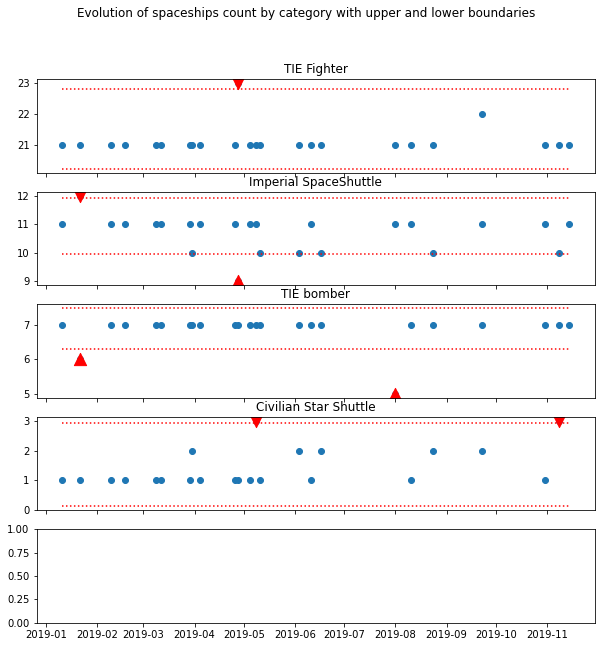

In [23]:
# Get the count of a ship_type for each date
series_by_type = []
fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)

date_min = data['date'].min()
date_max = data['date'].max()
for i, ship_type in enumerate(data['ship_type'].value_counts().index):
    ma_ship_type = data['ship_type'] == ship_type
    evol_count = data[ma_ship_type].groupby('date').count()['ship_type']
    axs[i].scatter(evol_count.index, evol_count)
    axs[i].set_title(ship_type)
    
    # Draw boundaries
    axs[i].hlines(counts_stats['bound_min'].loc[ship_type], xmin=date_min, xmax=date_max, color='r', linestyles='dotted')
    axs[i].hlines(counts_stats['bound_max'].loc[ship_type], xmin=date_min, xmax=date_max, color='r', linestyles='dotted')

    try:
        axs[i].scatter(break_max[ship_type].index, break_max[ship_type].values, color='r', s=150, marker='v')
        axs[i].scatter(break_min[ship_type].index, break_min[ship_type].values, color='r', s=150, marker='^')
    except:
        pass

plt.suptitle('Evolution of spaceships count by category with upper and lower boundaries')